## Scipy Optimization [Source](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)

SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding and curve fitting.

1. Scalar Functions Optimization
2. Local (Multivariate) Optimization
3. Global Optimization
4. Least-squares and Curve Fitting
5. Root finding

### Gradient Descient

In [3]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import seaborn as sns
sns.set()

Spherical Surface : $F(x,y) = x^{2} + y^{2}$

In [4]:
def sphere(x):
    return x[0]**2 + x[1]**2

def df_sphere(x):
    return np.array([2.0*x[0], 2.0*x[1]])

### Plot Surfaces

* Sphere

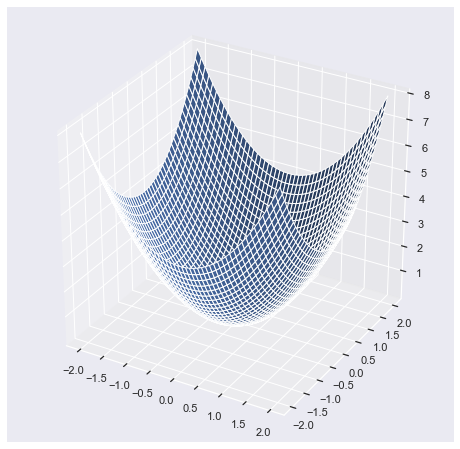

In [5]:
fig = pt.figure(figsize = [8,8])
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = sphere(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

### Plot Concors

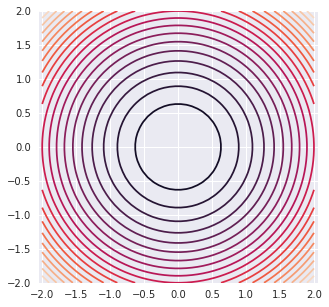

In [244]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh,20)

### Find Minimum

In [245]:
guesses = [np.array([2,2])]
for i in range(10000):
    x = guesses[-1]
    s = -df_sphere(x)
    alpha = 0.001

    next_guess = x + alpha * s
    guesses.append(next_guess)

In [248]:
guesses[0:10]

[array([2, 2]),
 array([1.996, 1.996]),
 array([1.992008, 1.992008]),
 array([1.98802398, 1.98802398]),
 array([1.98404794, 1.98404794]),
 array([1.98007984, 1.98007984]),
 array([1.97611968, 1.97611968]),
 array([1.97216744, 1.97216744]),
 array([1.96822311, 1.96822311]),
 array([1.96428666, 1.96428666])]

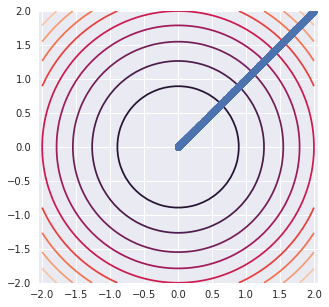

In [249]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 10)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "o")

### Abritrary Surface [source](https://en.wikipedia.org/wiki/Gradient_descent)

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/1ffee4fb42387d27e4a1e4d37d28239ff3b672fb)

In [250]:
def surface(x):
    return np.sin(0.5*x[0]**2 -0.25*x[1]**2 + 3)*np.cos(2.0*x[0] + 1.0 + np.exp(x[1]))

def df_surface(x):
    
    u = np.sin(0.5*x[0]**2 -0.25*x[1]**2 + 3)
    u_x = np.cos(0.5*x[0]**2 -0.25*x[1]**2 + 3)*x[0]
    u_y = -np.cos(0.5*x[0]**2 -0.25*x[1]**2 + 3)*0.5*x[1]
                                                     
    v = np.cos(2.0*x[0] + 1.0 + np.exp(x[1]))
    v_x = -np.sin(2.0*x[0] + 1.0 + np.exp(x[1]))*2.0
    v_y = np.sin(2.0*x[0] + 1.0 + np.exp(x[1]))*np.exp(x[1])                                              
    
    df_x = u_x*v + u*v_x
    df_y = u_y*v + u*v_y
                                                     
    return np.array([df_x,df_y])

### Plot Surface

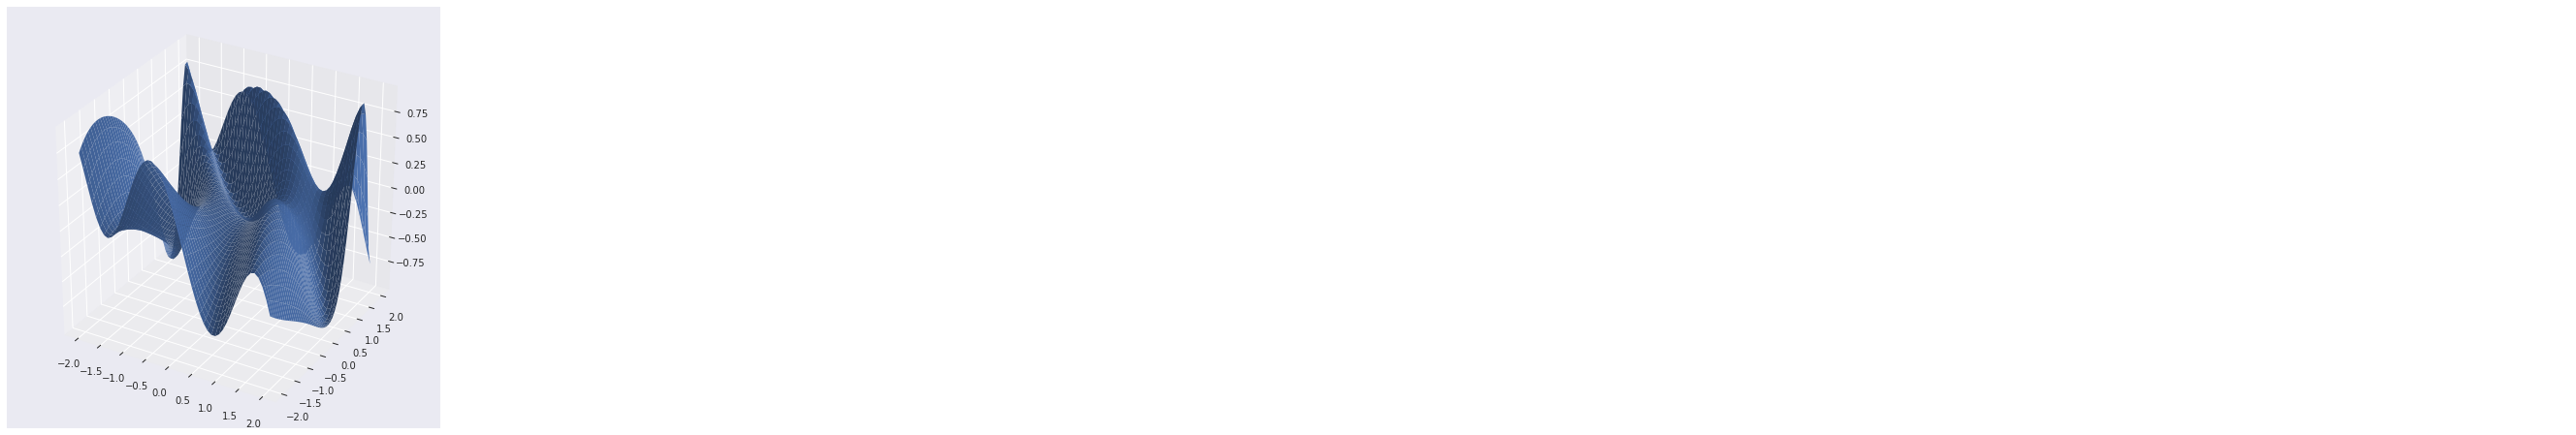

In [251]:
fig = pt.figure(figsize = [8,8])
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = surface(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

### Plot Contor

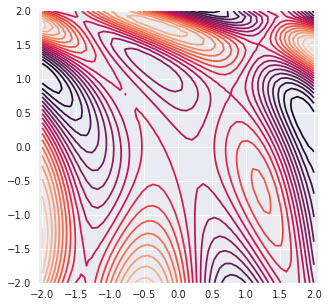

In [252]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh,20)

In [253]:
guesses = [np.array([-0.25,0.5])]
for i in range(100000):
    x = guesses[-1]
    s = -df_surface(x)
    alpha = 0.0001

    next_guess = x + alpha * s
    guesses.append(next_guess)

In [256]:
guesses[0:10]

[array([-0.25,  0.5 ]),
 array([-0.24995774,  0.4999897 ]),
 array([-0.24991547,  0.49997941]),
 array([-0.24987321,  0.49996911]),
 array([-0.24983095,  0.49995882]),
 array([-0.24978869,  0.49994853]),
 array([-0.24974643,  0.49993824]),
 array([-0.24970417,  0.49992795]),
 array([-0.24966191,  0.49991766]),
 array([-0.24961965,  0.49990738])]

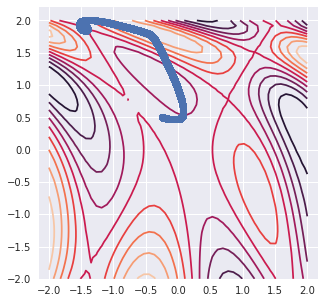

In [254]:
pt.figure( figsize = [5,5])
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 10)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "o")

### Scipy Optimization

In [255]:
from scipy.optimize import minimize

* Sphere

In [237]:
x0 = [np.array([5,5])]
res = minimize(sphere, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 73
         Function evaluations: 137


In [238]:
res

 final_simplex: (array([[-1.53149299e-09,  3.72359970e-09],
       [-1.89733109e-09, -4.32207878e-09],
       [ 5.12426026e-09, -1.63696990e-09]]), array([1.62106655e-17, 2.22802302e-17, 2.89377136e-17]))
           fun: 1.6210665476880626e-17
       message: 'Optimization terminated successfully.'
          nfev: 137
           nit: 73
        status: 0
       success: True
             x: array([-1.53149299e-09,  3.72359970e-09])

* Surface

In [235]:
x0 = [np.array([-0.25,0.5])]
res = minimize(surface, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.380860
         Iterations: 76
         Function evaluations: 148


In [236]:
res

 final_simplex: (array([[-0.36266707,  1.17858233],
       [-0.36266707,  1.17858233],
       [-0.36266707,  1.17858233]]), array([-0.38086004, -0.38086004, -0.38086004]))
           fun: -0.3808600432413275
       message: 'Optimization terminated successfully.'
          nfev: 148
           nit: 76
        status: 0
       success: True
             x: array([-0.36266707,  1.17858233])

## Newton's Conjugate Gradient Method

The minimum value of this function is 0 which is achieved when x =1

![img](img/0.png)

In [268]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

![img](img/1.png)

In [269]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

![img](img/2.png)

![img](img/3.png)

In [270]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [271]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [272]:
res = minimize(rosen, x0, method='Newton-CG',jac=rosen_der, hess=rosen_hess,
                options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24


In [274]:
res.x

array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

------

### References

1. https://andreask.cs.illinois.edu/cs357-s15/public/demos/12-optimization/Steepest%20Descent.html
2. https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_gradient_descent.html
3. https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
4. https://scipy-cookbook.readthedocs.io/index.html
5. http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html